# Tabular Playground September 2021

# Load Data

In [1]:
import os
import numpy as np
import pandas as pd
test = pd.read_csv('datasets/test.csv')
train = pd.read_csv('datasets/train.csv')

In [2]:
lst_train_dtypes = train.dtypes.value_counts()
print(lst_train_dtypes)

float64    118
int64        2
dtype: int64


All features are float and the index and 'claim' columns are int.  'claim' is the target variable.

# EDA

## Mutual Information

Before splitting the data I'm going to run an analysis of mutual information to see if there is any potentially important feature to use in a stratified split.

### Run MI

In order to run the intial MI analysis, I need to resolve all NaN values.  Rather than making a decision at this point on how to impute, I'm simply removing all rows with NaN for any feature.  This results in a loss of xxx rows.

In [3]:
from sklearn.feature_selection import mutual_info_classif
def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

X_init_mi = train.dropna(axis=0)
y_init_mi = X_init_mi.pop('claim')
mi_scores = make_mi_scores(X_init_mi, y_init_mi)

In [4]:
mi_scores.head(10)

f97     0.001698
f37     0.001328
f91     0.000966
f117    0.000958
f35     0.000943
f26     0.000914
f31     0.000864
f108    0.000856
f116    0.000838
f42     0.000838
Name: MI Scores, dtype: float64

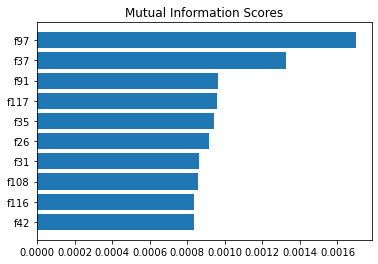

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plot_mi_scores(mi_scores.head(10))

MI scores are very low for all features.  `f97` has the highest score with 0.001698.  There are quite a few features with MI scores equal to 0 however, suggesting that the target variable is independent of each.  We **may** be able to drop those features.

In [6]:
zero_mi_scores = mi_scores[mi_scores == 0]
zero_mi_scores.shape
print(zero_mi_scores.shape[0], "of the", mi_scores.shape[0], "features have MI scores equal to zero")

51 of the 119 features have MI scores equal to zero


### Visualize MI

Now taking a look at the three most informative features.

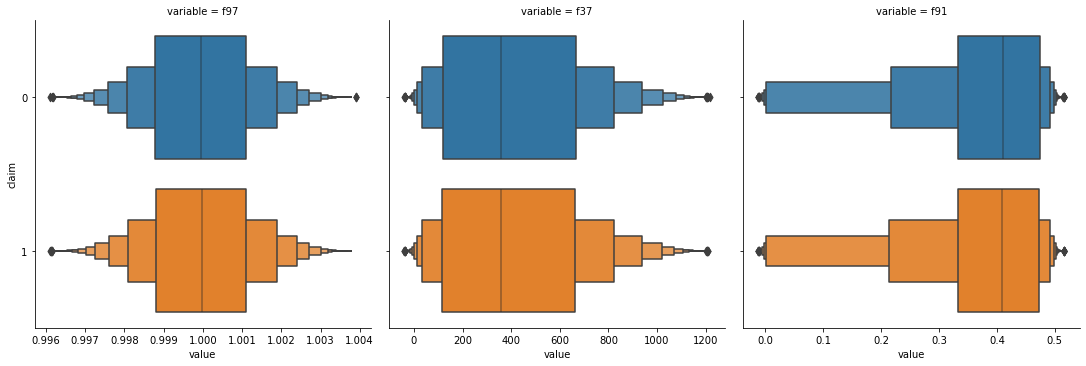

In [7]:
features = mi_scores.iloc[:3].index.values.tolist()
plot_df = train.melt(id_vars='claim', value_vars=features)
plot_df['claim'] = plot_df.claim.astype('category')
sns.catplot(x="value", y="claim", col="variable", data=plot_df, kind="boxen", sharex=False);

None of these features appear to be very informative towards predicting the variation in the target variable.  I may have wasted my time with this analysis.  Oh well, moving on to the PCA.  Maybe I'll have better luck after the PCA.

# Split Validation Set

# PCA & Feature Selection

# ML Pipeline

# Evaluation

